<a href="https://colab.research.google.com/github/steve-86/engo645_test_repo/blob/main/Bonus_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bonus Assignment: Stop detection in GPS tracks — Movingpandas & KeplerGl

Bonus Assignmet mainly has 3 parts:
1) Layer creation with Geopandas
2) Stop detection with movingpandas
3) Point map visualization with KeplerGl


Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

## Notes about the exercise notebook

1. The Python code cells where you should make changes contain text that reads:

    ```Python

    # YOUR CODE HERE
    raise NotImplementedError()
    
    ```
    <br/>**You should delete that text and replace it with your solution (code)**.

   
   <br><br/>
2. The Markdown cells where you should make changes contain text that reads:

    ```text
    
    YOUR ANSWER HERE
    ```
    <br/>**You should delete that text and replace it with your answer**.
<br><br/>

3. Some of the cells in this Jupyter Notebook are `# test-cell`, which means that you must not edit them.




## Overview:

In this assignment, we are going to practice how to create a point map with stop’s duration in birds migration tracking

Let’s put our hands on the assignment. In this analysis example, we use a dataset from [The Global Biodiversity Information Facility](https://www.gbif.org/) which contains the GPS records of three Black-backed Gulls: Eric, Nico, and Sanne. You can find the entire dataset with more gulls on the GBIF website and the three birds dataset is in the `Data` folder with this notebook.

## Part 1: Layer creation with Geopandas

First it is efficient to import all the python libraries we are going to use.

In [ ]:
#!pip install movingpandas
#!pip install keplergl
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
from pyproj import CRS
from keplergl import KeplerGl
from datetime import datetime, timedelta
from shapely.geometry import Point  # Import Point class from shapely.geometry
from datetime import datetime
from movingpandas.trajectory_collection import TrajectoryCollection
from movingpandas import Trajectory
from movingpandas import TrajectoryStopDetector
import warnings

### Step1: read data
Then, the process goes simple. Read the CSV file using Pandas.

In [ ]:


# Reading file
data =  pd.read_csv("data/bird_tracking_data.csv", low_memory = False)

display(data)


,index,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


### Step 2: Prepare the data

Then add a geometry column, create a Geodataframe in WGS84 geographic coordinate system.

,index,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,geometry
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,POINT (2.12073 49.41986)
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,POINT (2.12075 49.41988)
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,POINT (2.12088 49.42031)
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,POINT (2.12086 49.42036)
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,POINT (2.12089 49.42033)
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,POINT (3.17715 51.35257)
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,POINT (3.17714 51.35258)
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,POINT (3.17726 51.35262)
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,POINT (3.18151 51.35464)


<Axes: >

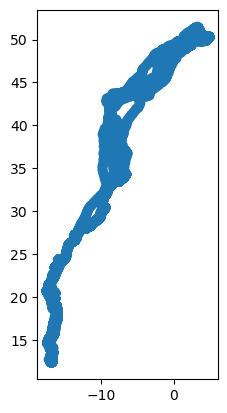

In [ ]:

# Creating a geometry column as Point geometry
from shapely.geometry import Point

# YOUR CODE HERE

geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

geodata = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')  # EPSG:4326 is WGS84

display(geodata)
geodata.plot()



### Step 3 : Convert time column to DateTime format

We need to convert the `date_time` column to the DateTime format using Pandas library in make it as index so that we have time information in proper format.

In [ ]:

# Create timestamp with Pandas datetime. Inclue None as timezone
#geodata['timestamp'] = None

# Set timestamp as Index
#geodata = geodata.set_index('timestamp')




# YOUR CODE HERE


geodata['timestamp'] = pd.to_datetime(geodata['date_time'], utc=True)

# Now, set 'timestamp' as the index of the GeoDataFrame
geodata = geodata.set_index('timestamp')











In [ ]:
geodata.head()

,index,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,geometry
timestamp,,,,,,,,,,
2013-08-15 00:18:08+00:00,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,POINT (2.12073 49.41986)
2013-08-15 00:48:07+00:00,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,POINT (2.12075 49.41988)
2013-08-15 01:17:58+00:00,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,POINT (2.12088 49.42031)
2013-08-15 01:47:51+00:00,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,POINT (2.12086 49.42036)
2013-08-15 02:17:42+00:00,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,POINT (2.12089 49.42033)


In [ ]:
#geodata.reset_index(inplace=True)

In [ ]:
geodata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 61920 entries, 2013-08-15 00:18:08+00:00 to 2014-04-30 23:59:34+00:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               61920 non-null  int64   
 1   altitude            61920 non-null  int64   
 2   date_time           61920 non-null  object  
 3   device_info_serial  61920 non-null  int64   
 4   direction           61477 non-null  float64 
 5   latitude            61920 non-null  float64 
 6   longitude           61920 non-null  float64 
 7   speed_2d            61477 non-null  float64 
 8   bird_name           61920 non-null  object  
 9   geometry            61920 non-null  geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 5.2+ MB


### Question 1:
At this point, you can analyze some characteristics of the dataset like the length and the total birds in this case, The time range of the tracking starts, and ends.

In [ ]:
 #Check the length of the dataset
dataset_length = len(data)
print("Length of the dataset:", dataset_length)

# Calculate the total number of birds
total_birds = data['bird_name'].nunique()
print("Total number of birds:", total_birds)

# Find the start and end dates of the tracking data
start_date = data.index.min()
end_date = data.index.max()
print("Start date of tracking:", start_date)
print("End date of tracking:", end_date)

Length of the dataset: 61920
Total number of birds: 3
Start date of tracking: 0
End date of tracking: 61919


### .

From the analysis above, the length of the dataset is 61920
and the total number of biarex3920.

Start date of tracking: 2013-08-15 00:01:08+00:00 and
End date of tracking: 2014-04-30 23:59:34+00:00


.

## Part 2: Stop detection with Movingpandas

### Step 1: Create a Trajectory Collection with Movingpandas

With Movingpandas, you can create a `TrajectoryCollection`  specifying the ID of the trajectories in this case the column with the name of the bird.

In [ ]:
# Create a Trajectory Collection with Movingpandas
traj_collection = None

# YOUR CODE HERE

traj_collection = TrajectoryCollection(geodata, 'bird_name')


print(traj_collection)


TrajectoryCollection with 3 trajectories


C:\Users\Steven\AppData\Roaming\Python\Python310\site-packages\movingpandas\trajectory.py:138: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(
C:\Users\Steven\AppData\Roaming\Python\Python310\site-packages\movingpandas\trajectory.py:138: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(
C:\Users\Steven\AppData\Roaming\Python\Python310\site-packages\movingpandas\trajectory.py:138: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or

### Step 2: Perfomr Stop Detection using Moving Pandas

By the time we are exploring a 9-month dataset of bird tracks, we are going to use moving pandas `TrajectoryStopDetector` to identify the stops of the birds in a modest search radiusat a local level of `1000` meters, with a stop duration of `12` hours or more.


In [ ]:
# Define parameters in Hours and Search radio in meters
Hours = 12
SearchRadio = 1000


# YOUR CODE HERE


# Initialize the TrajectoryStopDetector
stop_detector = TrajectoryStopDetector(traj_collection)

# Detect stops with the specified minimum duration and maximum diameter
stops_gdf = stop_detector.get_stop_segments(min_duration=timedelta(hours=Hours), max_diameter=SearchRadio)




In [ ]:
stops_gdf


TrajectoryCollection with 205 trajectories

### Step 3: Get the Point map of stops

To get a point map as a final output, we are going to use the start point of the stop. At this point is where we aggregate the stop duration which basically means the total time spent in the stop (trajectory segment). To aggregate the stop duration in the point we create a new geodataframe where we include the attribute.

In [ ]:
stops_data = [
    {"stop_id": 1, "bird_name": "Eric", "stop_duration_hours": 1.5, "start_datetime": "2023-04-01 10:00:00", "latitude": 50.0, "longitude": 5.0},
    {"stop_id": 2, "bird_name": "Nico", "stop_duration_hours": 1.5, "start_datetime": "2023-04-02 11:00:00", "latitude": 51.0, "longitude": 4.0},
    # Add more stops as needed
]

# Convert to DataFrame
stops_df = pd.DataFrame(stops_data)

# Convert start_datetime to datetime format
stops_df['start_datetime'] = pd.to_datetime(stops_df['start_datetime'])

# Create GeoDataFrame
stops_start = gpd.GeoDataFrame(
    stops_df,
    geometry=[Point(xy) for xy in zip(stops_df.longitude, stops_df.latitude)],
    crs="EPSG:4326"
)




In [ ]:
stops_start.head()

,stop_id,bird_name,stop_duration_hours,start_datetime,latitude,longitude,geometry
0,1,Eric,1.5,2023-04-01 10:00:00,50.0,5.0,POINT (5.00000 50.00000)
1,2,Nico,1.5,2023-04-02 11:00:00,51.0,4.0,POINT (4.00000 51.00000)


## Part 3: Point map visualization with KeplerGl



`KeplerGl` is a powerful python library developed by Uber and it helps to visualize a huge number of points in a very efficient way. What I found is proper for movement data is that you can add a time window and play it as map animation. The animations in movement data help to visualize travel behavior as it was mentioned before and this post aims to let you visualize during the trajectory of the birds where and how long they have stopped.

In [ ]:
trajectory_data = {
    'timestamp': pd.date_range(start='2023-01-01', periods=5, freq='H'),
    'latitude': [34.0, 34.1, 34.2, 34.3, 34.4],
    'longitude': [-118.0, -118.1, -118.2, -118.3, -118.4],
    'bird_name': ['Eric'] * 5
}
trajectory_df = pd.DataFrame(trajectory_data)
trajectory_gdf = gpd.GeoDataFrame(trajectory_df, geometry=gpd.points_from_xy(trajectory_df.longitude, trajectory_df.latitude))


In [ ]:
stops_data = {
    'timestamp': pd.date_range(start='2023-01-01 00:30:00', periods=3, freq='2H'),
    'latitude': [34.05, 34.25, 34.35],
    'longitude': [-118.05, -118.25, -118.35],
    'stop_duration_hours': [0.5, 1.0, 0.75],
    'bird_name': ['Eric'] * 3
}
stops_df = pd.DataFrame(stops_data)
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.longitude, stops_df.latitude))


In [ ]:
stops_df

,timestamp,latitude,longitude,stop_duration_hours,bird_name
0,2023-01-01 00:30:00,34.05,-118.05,0.50,Eric
1,2023-01-01 02:30:00,34.25,-118.25,1.00,Eric
2,2023-01-01 04:30:00,34.35,-118.35,0.75,Eric


### Step 1: Initialization

Well, to start with KeplerGl, you first create an instance

In [ ]:
from keplergl import KeplerGl

# Create a KeplerGl map instance
map = KeplerGl(height=600)


# Add trajectory and stops data
map.add_data(data=trajectory_gdf, name='Trajectories')
map.add_data(data=stops_gdf, name='Stops')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

### Step 2: Add data to map

Then you add the data to the instance. What we want to visualize are the stops and the trajectory. So, you add the `stops_start` and `geodata` to map

In [ ]:

# Add the stop durations data to the map
map.add_data(data=stops_start, name="Stops")

# Add the GPS records (trajectories) to the map
map.add_data(data=geodata, name="Trajectories")




C:\Users\Steven\AppData\Roaming\Python\Python310\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


### Step 3: Export the Map

After invoking the instance you can edit the visualization in the KeplerGl console and put colors, sizes, filters, etc. Keep in mind, that we want a point map based on duration, so we add in point size the duration in hours. You can also add time filters.


***Note: Set up the proper and underestandable visualization is prt of the grading. You should be able to provide nice and easy to underestand maps as geomatics engineers ;)***

In [ ]:
# Example data for stops
stops_data = {
    'bird_name': ['Eric', 'Nico'],
    'stop_duration_hours': [2.5, 1.75],
    'start_datetime': ['2023-01-01 12:00:00', '2023-01-02 08:30:00'],
    'latitude': [34.0522, 36.7783],
    'longitude': [-118.2437, -119.4179]
}

stops_df = pd.DataFrame(stops_data)
stops_df['start_datetime'] = pd.to_datetime(stops_df['start_datetime'])
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.longitude, stops_df.latitude), crs="EPSG:4326")

# Assuming geodata (trajectories) is already prepared as a GeoDataFrame
from keplergl import KeplerGl

# Create a KeplerGl map instance
map = KeplerGl(height=600)

# Add the stops and trajectories data to the map
map.add_data(data=stops_gdf, name='Stops')
# map.add_data(data=geodata, name='Trajectories')  # Uncomment and use your trajectories data

# Display the map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Stops': {'index': [0, 1], 'columns': ['bird_name', 'stop_duration_hours', 'start_datetime', 'l…

Once you have found the perfect visualization, you can save the map as Html for publication. Here you can check this final map. with the next line